# Perspective transform

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
roi_images = pickle.load(open( "pickle_data/roi_images.p", "rb" ) )
und_images = pickle.load(open( "pickle_data/undistorted_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20115 bytes to 0. Functions_Clases Pipeline.py


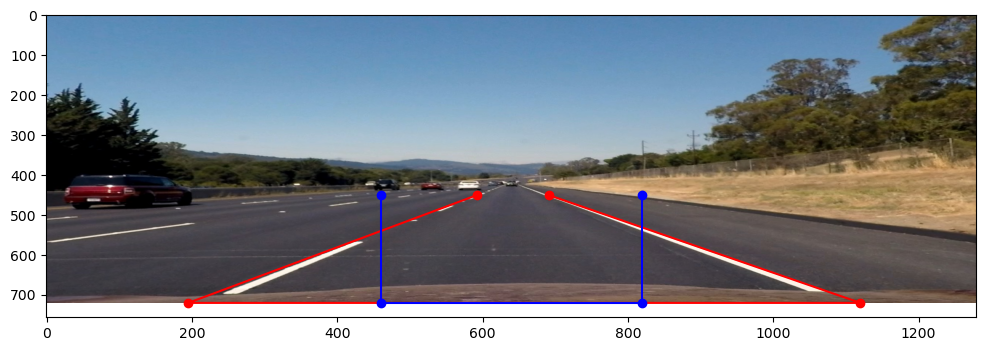

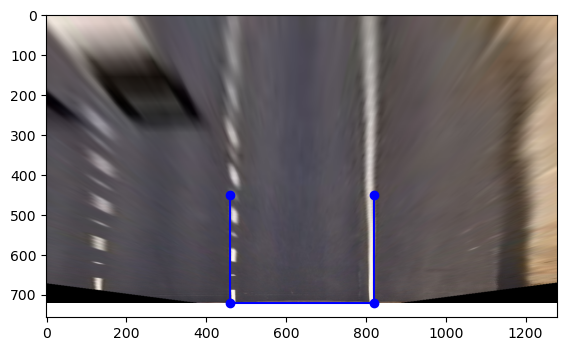

In [2]:
img = und_images[1]
displayListImages([img],cols=1,cmap='gray',figSize=[12,4])

#Source
# Place source points for uimage wrapping
dotS_UL=[592,450]; dotS_UR= [691,450]
dotS_LL=[195,720] ; dotS_LR= [1120,720]

src= np.float32([dotS_UL,dotS_LL,dotS_LR,dotS_UR])

# Create and plot source plane
xs = [x[0] for x in src]
ys = [x[1] for x in src]

plt.plot(xs,ys, 'ro-')

#Destination
hwidth = 180
offset = -0
dotD_UL=[offset+(1280//2)-hwidth,450]; dotD_UR= [offset+(1280//2)+hwidth,450]
dotD_LL=[offset+(1280//2)-hwidth,720] ; dotD_LR= [offset+(1280//2)+hwidth,720]

dst= np.float32([dotD_UL,dotD_LL,dotD_LR,dotD_UR])

xd = [x[0] for x in dst]
yd = [x[1] for x in dst]

plt.plot(xd,yd, 'bo-')

# Create and plot source plane
xd = [x[0] for x in dst]
yd = [x[1] for x in dst]

#Computye perspective transform
M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(img, M, (1280,720), flags=cv2.INTER_LINEAR)

plt.figure()
plt.imshow(warped)
plt.plot(xd,yd, 'bo-')

In [7]:
maskContour = cv2.polylines(img,[src],True,(0,0,255),thickness=5)
displayListImages([img],cols=1,cmap='gray',figSize=[12,4])

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\drawing.cpp:2435: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'cv::polylines'


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

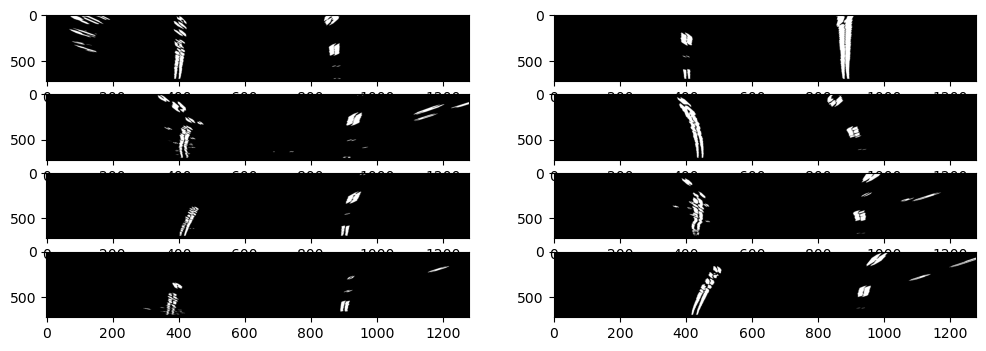

In [3]:
warped_images = []
M_values = []
Minv_values = []


for img in roi_images:
    warped_img,M, Minv = warp_image(img, hwidth = 250 ,offset = 0, height = -300 )
    warped_images.append(warped_img)
    M_values.append(M)
    Minv_values.append(Minv)
    
        
displayListImages(warped_images,cols=2,cmap='gray',figSize=[12,8])

## Dump data

In [4]:
pickle.dump( [warped_images, M_values, Minv_values ], open( "pickle_data/warped_images_params.p", "wb" ) )